# sbiz 와 nice biz info  데이터 결합
- 액티브_중소법인_기업외감_산업분류.xlsx, 휴폐업_중소법인_기업개요_산업분류.xlsx에 각각 결합
- 사업자번호기준, nice biz info 결합
- 행정구역 및 대분류업종 기준으로 sbiz결합

20220125


 ## 소상공인시장진흥공단 Sbiz - 지역별 경영현황 데이터 불러오기
 
- https://sg.sbiz.or.kr/godo/index.sg
- https://sg.sbiz.or.kr/godo/stat/updens.sg
- 재무데이터 사업자들의 주소(시군구), 업종 기준으로 merge하면 데이터 살리수있을듯???
- **주간인구수**: 시군구 단위의 주간인구통계 (단위:천명) /\
  **밀집도**: 인구 천명당 사업체수 /\
  **밀집도_중위값**: 세세분류 단위에서 밀집도 중위값 /\
  **밀집정도**: 밀집도 - 밀집도_중위값 (0 이상인 경우 " 고"로, 미안인 경우 " 저"로 구분) -->재무데이터와 결합시, 업종별 중위값의 평균값으로 고.저 구분 필요할 것으로 보임/\
  **동종근로자_임금_수준미만**: 연간 영업이익 대비 동종입금근로자 임금 수준미만인 업종 비중 /\
  **동종근로자_임금_수준미만_척도**: 4점 척도로 연간 영업이익 대비 등종업종근로자 임금 수준이 미만인 사업체 비중을 세세분류 수준에서, \
  사업체 중 차지하는 비중이 75 % 이상 " 매우 높음"\
  사업체 중 차지하는 비중이 50 ~ 7496 " 높음"\
  사업체 중 차지하는 비중이 25 ~ 4996 " 보통"\
  사업체 중 차지하는 비중이 25 % 이하 " 낮음"으로 평가
  
  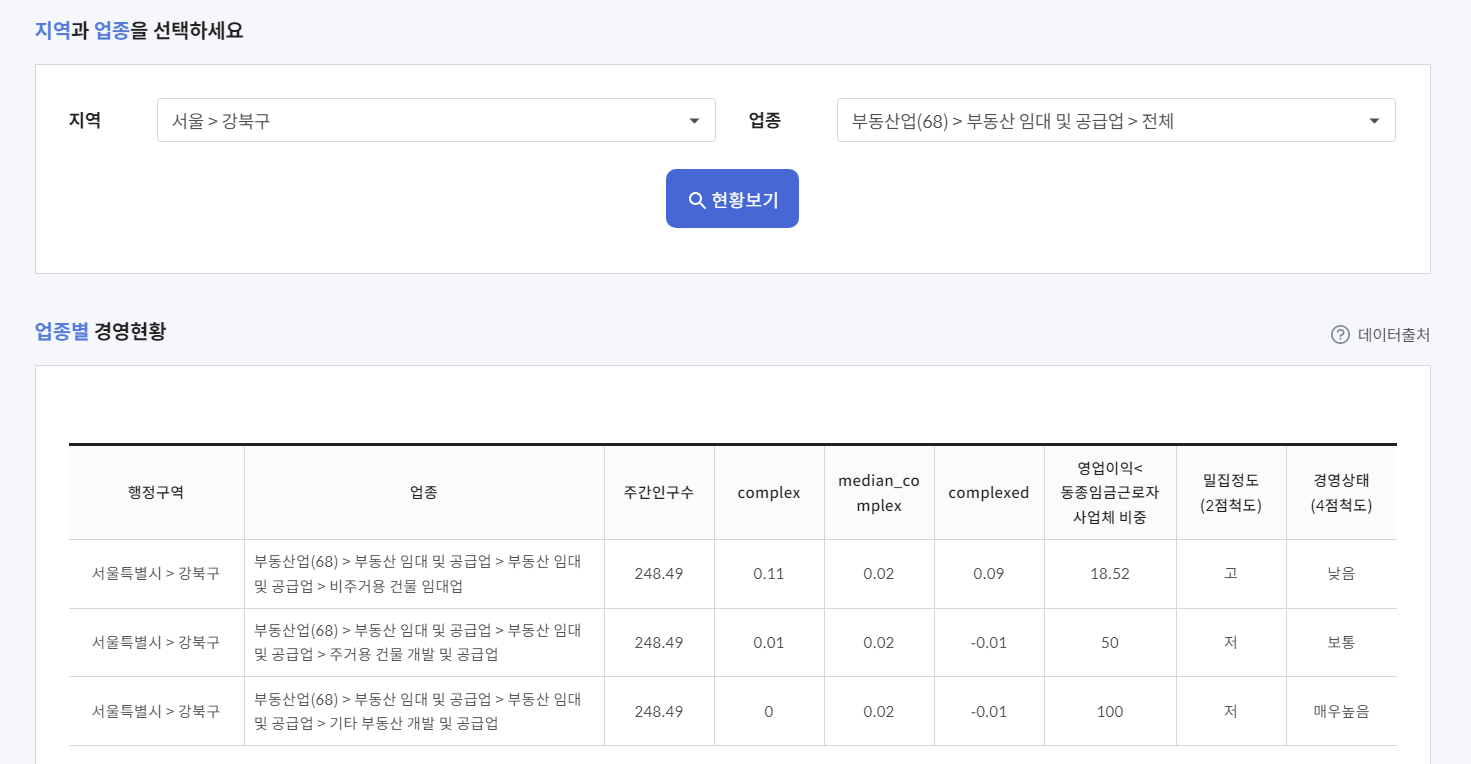


In [33]:
import pandas as pd

df_sbiz=pd.read_csv('C:/Users/shcho/Desktop/윤영/sesac/공모전/data/1차정제/팀원 공통자료/sbiz_crawling_preprocessed.csv',encoding = 'utf-8')
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 > 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저


### 행정구역, 업종 칼럼 전처리
- '>' 및 괄호안 숫자 제거, 공백기준 업종 분리 

In [34]:
# 행정구역 '>' 제거
df_sbiz['행정구역']=df_sbiz['행정구역'].str.replace('>', ' ')



In [178]:
address_split=df_sbiz['행정구역'].str.split('  ')
address_split[0]
address_split.str.get(1)

0         종로구
1         종로구
2         종로구
3         종로구
4         종로구
         ... 
70050     양양군
70051     양양군
70052     양양군
70053     양양군
70054     양양군
Name: 행정구역, Length: 70055, dtype: object

In [191]:
df_sbiz["시도"] = address_split.str.get(0)
df_sbiz["군구"] = address_split.str.get(1)
df_sbiz['군구']=df_sbiz["군구"].str.strip() 

In [180]:
#df_sbiz['업종'][0]
#업종 칼럼 '>' 기준 분리

ind_split=df_sbiz['업종'].str.split('>')
ind_split

0        [제조업(10~34) ,  동물성 및 식물성 유지 제조업 ,  동물성 및 식물성 유...
1         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  떡류 제조업]
2         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  빵류 제조업]
3        [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  천연 및 ...
4         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  커피 가공업]
                               ...                        
70050    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70051    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70052    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70053    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70054    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
Name: 업종, Length: 70055, dtype: object

In [231]:
# 기존 df_sbiz 데이터프레임에 삽입
df_sbiz["대분류"] = ind_split.str.get(0)
df_sbiz["중분류"] = ind_split.str.get(1)
#중복인듯?
#df_sbiz["중분류2"] = ind_split.str.get(2)
df_sbiz["소분류"] = ind_split.str.get(3)
df_sbiz["행정구역2"]=df_sbiz["시도"]+' '+df_sbiz["군구"]
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,대분류,중분류,소분류,대분류2,시도,군구,행정구역2
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업,제조업,서울특별시,종로구,서울특별시 종로구
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고,제조업(10~34),기타 식품 제조업,떡류 제조업,제조업,서울특별시,종로구,서울특별시 종로구
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,빵류 제조업,제조업,서울특별시,종로구,서울특별시 종로구
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업,제조업,서울특별시,종로구,서울특별시 종로구
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,커피 가공업,제조업,서울특별시,종로구,서울특별시 종로구


In [249]:
# 공백제거
df_sbiz['대분류2']=df_sbiz["대분류"].str.replace(r"\(.*\)","")
df_sbiz['대분류2']=df_sbiz["대분류2"].str.strip() #칼럼별로 적용할 경우str붙이기 , 안붙이면 리슽으에서만 가능
df_sbiz['중분류']=df_sbiz["중분류"].str.strip()

- sbiz대분류가 10차 산업분류의 업종대분류와 일치
- 모델링을 위해 대분류 기준으로 merge 할예정

In [250]:
pd.DataFrame(df_sbiz['대분류2'].value_counts())

,대분류2
도매 및 소매업,23469
제조업,14433
건설업,6757
"협회 및 단체, 수리 및 기타 개인 서비스업",5268
"예술, 스포츠 및 여가관련 서비스업",4688
숙박 및 음식점업,3308
"사업시설 관리, 사업 지원 및 임대 서비스업",3162
교육 서비스업,1976
부동산업,1737
운수 및 창고업,1686


- 중분류는 10차 산업분류의 중분류와 불일치하는 경우가 대다수인것 으로 보임

In [251]:
pd.DataFrame(df_sbiz['중분류'].value_counts())

,중분류
생활용품 도매업,4625
음ㆍ식료품 및 담배 도매업,2803
음식점업,2320
유원지 및 기타 오락관련 서비스업,2033
그 외 기타 개인 서비스업,1942
...,...
악기 제조업,3
"증기, 냉ㆍ온수 및 공기 조절 공급업",3
마그네틱 및 광학 매체 제조업,1
항공 화물 운송업,1


- 행정구역(시도+시군구), 업종 groupby mean 데이터셋 만들기
- 주간인구수는 시군구 단위 통계라 같게 나옴

In [252]:
sbiz_sgg_ind1=df_sbiz.groupby(['행정구역2','대분류2']).mean()
sbiz_sgg_ind1.reset_index(inplace = True )
sbiz_sgg_ind1.rename(columns={'대분류2':'대분류'})
sbiz_sgg_ind1.rename(columns={'행정구역2':'행정구역'})

,행정구역,대분류2,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857
...,...,...,...,...,...,...,...
3105,충청북도 충주시,"수도, 하수 및 폐기물 처리, 원료 재생업",207.64,0.010000,0.010000,0.000000,75.000000
3106,충청북도 충주시,숙박 및 음식점업,207.64,1.144615,0.286923,0.860000,74.146154
3107,충청북도 충주시,"예술, 스포츠 및 여가관련 서비스업",207.64,0.089565,0.034783,0.056522,79.766957
3108,충청북도 충주시,운수 및 창고업,207.64,0.351818,0.056364,0.300909,70.058182


## NICE Biz info - 기업별 연봉현황 및 산업현황 데이터  불러오기

- https://www.nicebizinfo.com/cm/CM0100M001GE.nice
- **address**: 주소 / **industry**: 산업 / **ind_rank**: 산업평가종합등급 / **payroll**: 평균연봉 / **new_payroll**: 올해입사자 평균연봉 /**employee**: 종업원수 / **employment**: 입사율(연간입사자) / **resignation**: 퇴사율(연간퇴사자) / **cmp_years**: 업력

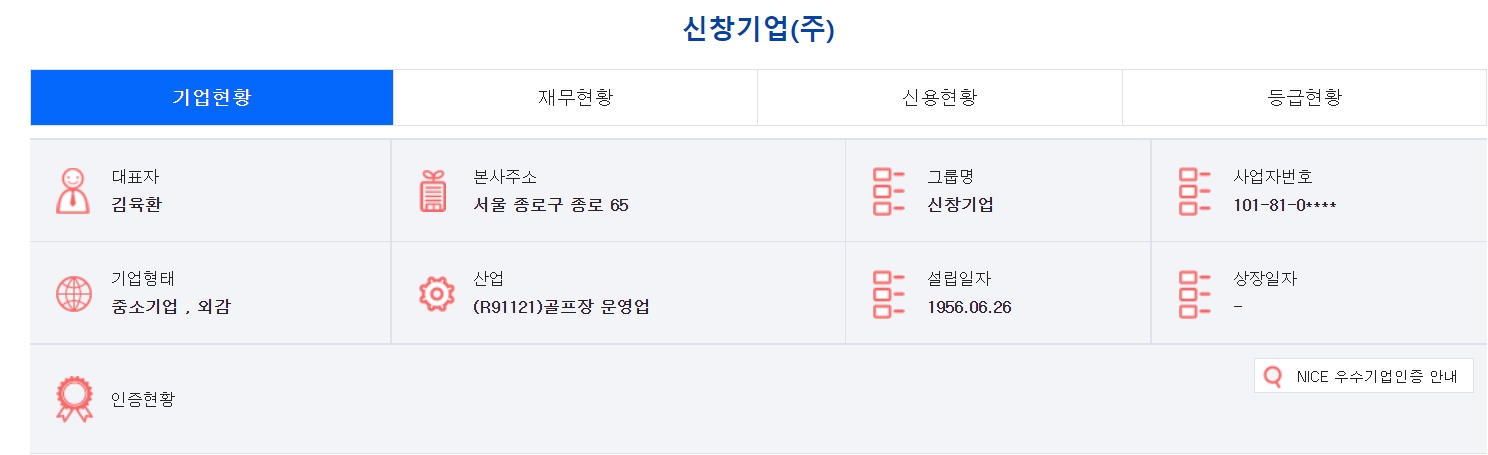


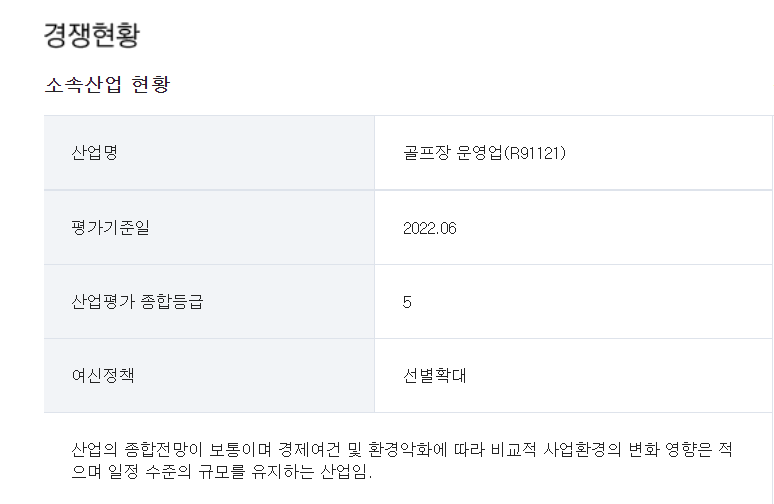

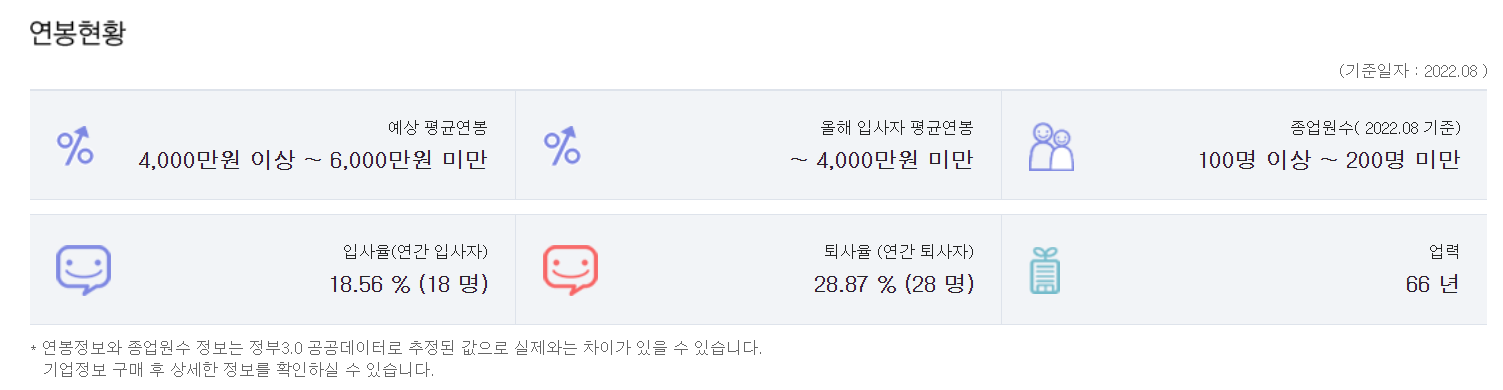

In [76]:
nice_biz=pd.read_excel('C:/Users/shcho/Desktop/윤영/sesac/공모전/공통기헙3/ACSM/nice_bizinfo/bizinfo_df_prep.xlsx')
nice_biz.head()

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.000,0.00,53.0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.800,0.60,55.0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.125,0.25,NaN
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.000,0.00,NaN


### address 칼럼 전처리
- sbiz와의 결합을 위해 시도+군구 까지의 칼럼 만들기

In [77]:

#address칼럼 ' ' 공백기준 분리

address_split=nice_biz['address'].str.split(' ')
address_split[10000]

['충남', '당진시', '신평면', '관곡길', '2']

In [155]:
# 시도 전처리
nice_biz["시도"] = address_split.str.get(0)
nice_biz=nice_biz.replace({'시도' : {'서울' : '서울시'}})
nice_biz=nice_biz.replace({'시도' : {'경남' : '경상남도'}})
nice_biz=nice_biz.replace({'시도' : {'충남' : '충청남도'}})
nice_biz=nice_biz.replace({'시도' : {'경북' : '경상북도'}})
nice_biz=nice_biz.replace({'시도' : {'충북' : '충청북도'}})
nice_biz=nice_biz.replace({'시도' : {'강원' : '강원도'}})
nice_biz=nice_biz.replace({'시도' : {'충북' : '충청북도'}})
nice_biz=nice_biz.replace({'시도' : {'경기' : '경기도'}})
nice_biz=nice_biz.replace({'시도' : {'서울시' : '서울특별시'}})
nice_biz=nice_biz.replace({'시도' : {'부산' : '부산광역시'}})
nice_biz=nice_biz.replace({'시도' : {'울산' : '울산광역시'}})
nice_biz=nice_biz.replace({'시도' : {'인천' : '인천광역시'}})
nice_biz=nice_biz.replace({'시도' : {'전북' : '전라북도'}})
nice_biz=nice_biz.replace({'시도' : {'전남' : '전라남도'}})
nice_biz=nice_biz.replace({'시도' : {'세종특별시' : '세종특별자치시'}})
nice_biz=nice_biz.replace({'시도' : {'세종' : '세종특별자치시'}})
nice_biz=nice_biz.replace({'시도' : {'제주' : '제주특별자치도'}})
nice_biz=nice_biz.replace({'시도' : {'대전' : '대전광역시'}})
nice_biz=nice_biz.replace({'시도' : {'대구' : '대구광역시'}})
nice_biz=nice_biz.replace({'시도' : {'광주' : '광주광역시'}})
nice_biz['시도'].unique()

array(['서울특별시', '경기도', '충청북도', '인천광역시', '대구광역시', '부산광역시', nan, '전라북도',
       '강원도', '경상북도', '대전광역시', '전라남도', '경상남도', '제주특별자치도', '충청남도', '광주광역시',
       '울산광역시', '세종특별자치시', '아산군'], dtype=object)

In [156]:
nice_biz[nice_biz['시도']=='아산군']


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도,군구,시도군구,군구2,면,면2
20296,3128100483,아산군 선장면 신성리산 113-8,(R91121)골프장 운영업,5.0,1.0,1.0,2.0,0.1538,0.2051,50.0,아산군,선장면,충청남도 선장면,신성리산,신성리산,113-8


In [157]:
nice_biz=nice_biz.replace({'시도' : {'아산군' : '충청남도'}})
nice_biz['시도'].unique()

array(['서울특별시', '경기도', '충청북도', '인천광역시', '대구광역시', '부산광역시', nan, '전라북도',
       '강원도', '경상북도', '대전광역시', '전라남도', '경상남도', '제주특별자치도', '충청남도', '광주광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

- nice biz 크롤링시, 주소값이 검색되지 않은 기업 1380개

In [158]:
print(len(nice_biz[nice_biz['시도'].isnull()]))
print(len(nice_biz[nice_biz['address'].isnull()]))

1380
1380


In [159]:
# 군구 전처리
nice_biz["군구"] = address_split.str.get(1)
nice_biz["군구"].unique()

array(['종로구', '중구', '구로구', '의왕시', '강남구', '서대문구', '의정부시', '음성군', '성남시',
       '금천구', '파주시', '서초구', '성동구', '연수구', '영등포구', '김포시', '안양시', '고양시',
       '마포구', '강서구', '용산구', '부평구', '평택시', '동대문구', '하남시', '동구', '광진구',
       '송파구', '서구', '수원시', '제천시', nan, '용인시', '달서구', '전주시', '성북구', '강릉시',
       '양천구', '화성시', '포항시', '강동구', '과천시', '영광군', '동작구', '목포시', '상주시',
       '익산시', '김제시', '구미시', '군포시', '광주시', '춘천시', '여수시', '인제군', '여주시',
       '시흥시', '안동시', '오산시', '창녕군', '영암군', '제주시', '정읍시', '중랑구', '당진시',
       '경주시', '양주시', '안산시', '청주시', '포천시', '달성군', '남양주시', '광양시', '창원시',
       '계양구', '미추홀구', '진천군', '의령군', '아산시', '완주군', '부천시', '충주시', '거제시',
       '북구', '영덕군', '김해시', '남구', '서천군', '수성구', '수영구', '양산시', '유성구', '논산시',
       '은평구', '안성시', '남동구', '울주군', '가평군', '사상구', '문경시', '보령시', '관악구',
       '예산군', '천안시', '이천시', '노원구', '군산시', '칠곡군', '함안군', '진주시', '순천시',
       '광명시', '영천시', '영주시', '산청군', '해운대구', '사천시', '도봉구', '금정구', '광산구',
       '나주시', '소정면', '연제구', '기장군', '강북구', '강화군', '순창군', '부산진구', '서산시',
     

In [160]:
nice_biz['시도군구']=nice_biz['시도']+' '+nice_biz['군구']


In [161]:
nice_biz["면"] = address_split.str.get(2)
nice_biz["면2"] = address_split.str.get(3)

In [162]:
nice_biz.to_excel('nicebiz_sido.xlsx')

In [163]:
nice_biz['시도군구'].unique()

array(['서울특별시 종로구', '서울특별시 중구', '서울특별시 구로구', '경기도 의왕시', '서울특별시 강남구',
       '서울특별시 서대문구', '경기도 의정부시', '충청북도 음성군', '경기도 성남시', '서울특별시 금천구',
       '경기도 파주시', '서울특별시 서초구', '서울특별시 성동구', '인천광역시 연수구', '서울특별시 영등포구',
       '경기도 김포시', '경기도 안양시', '경기도 고양시', '서울특별시 마포구', '서울특별시 강서구',
       '서울특별시 용산구', '인천광역시 부평구', '경기도 평택시', '서울특별시 동대문구', '경기도 하남시',
       '인천광역시 중구', '대구광역시 동구', '서울특별시 광진구', '서울특별시 송파구', '인천광역시 서구',
       '부산광역시 동구', '경기도 수원시', '충청북도 제천시', nan, '경기도 용인시', '대구광역시 달서구',
       '전라북도 전주시', '서울특별시 성북구', '강원도 강릉시', '서울특별시 양천구', '경기도 화성시',
       '경상북도 포항시', '대전광역시 서구', '서울특별시 강동구', '경기도 과천시', '전라남도 영광군',
       '서울특별시 동작구', '전라남도 목포시', '경상북도 상주시', '전라북도 익산시', '전라북도 김제시',
       '경상북도 구미시', '경기도 군포시', '경기도 광주시', '강원도 춘천시', '전라남도 여수시', '강원도 인제군',
       '경기도 여주시', '경기도 시흥시', '경상북도 안동시', '경기도 오산시', '경상남도 창녕군',
       '부산광역시 강서구', '전라남도 영암군', '제주특별자치도 제주시', '전라북도 정읍시', '서울특별시 중랑구',
       '충청남도 당진시', '부산광역시 서구', '경상북도 경주시', '경기도 양주시', '경기도 안산시',
       '충청북도 청주시', '경기도 포천시', '대구광역시 달

In [164]:
nice_biz["군구2"] = address_split.str.get(2)
nice_biz["군구2"].unique()

array(['삼일대로', '청계천로', '율곡로', ..., '청동로', '덕안로', '51,'], dtype=object)

In [203]:
sbiz_sgg_ind1['행정구역'].str.len()

0        9
1        9
2        9
3        9
4        9
        ..
3105    10
3106    10
3107    10
3108    10
3109    10
Name: 행정구역, Length: 3110, dtype: int64

In [165]:
pd.DataFrame(sbiz_sgg_ind1['행정구역'].unique())

,0
0,강원도 강릉시
1,강원도 고성군
2,강원도 동해시
3,강원도 삼척시
4,강원도 속초시
...,...
247,충청북도 청주시상당구
248,충청북도 청주시서원구
249,충청북도 청주시청원구
250,충청북도 청주시흥덕구


### address 전처리2
- sbiz(오)는 시도+군구로 이루어져 있으며 시도마다 ㅇㅇ시 ㅇㅇ구,  ㅇㅇ도 ㅇㅇ시, ㅇㅇ도 ㅇㅇ시 ㅇㅇ구, ㅇㅇ시 ㅇㅇ군 등의 형태로 구성됨
- 이에, nice biz_info(왼)의 address의 전처리 작업 필요
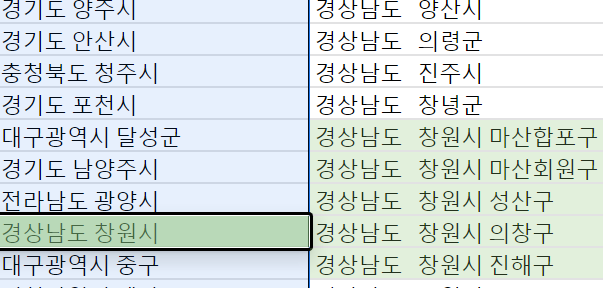

In [ ]:
- 나이스 비즈인포의 주소에 sbiz 주소 유니크값이 속하면 매칭


In [168]:
pd.DataFrame(nice_biz["시도군구"].unique()).to_excel('nice_biz_prep_unique.xlsx')

- sbiz 군구 문자열 길이가 5이상인 시,도들에 대한 정제 필요확인

In [193]:
#pd.DataFrame(sbiz_sgg_ind1['행정구역'].unique())
temp1=df_sbiz[df_sbiz['군구'].str.len()>=5]
temp1

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,대분류,중분류,소분류,대분류2,시도,군구
7780,충청북도 청주시흥덕구,"전기, 가스, 증기 및 공기 조절 공급업(35) > 증기, 냉ㆍ온수 및 공기 조절 ...",793.43,0.00,0.00,0.00,100.00,저,"전기, 가스, 증기 및 공기 조절 공급업(35)","증기, 냉ㆍ온수 및 공기 조절 공급업","증기, 냉ㆍ온수 및 공기 조절 공급업","전기, 가스, 증기 및 공기 조절 공급업",충청북도,청주시흥덕구
7789,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 하수, 폐수 및 분뇨 처...",793.43,0.00,0.01,-0.01,100.00,저,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","하수, 폐수 및 분뇨 처리업",폐수 처리업,"수도, 하수 및 폐기물 처리, 원료 재생업",충청북도,청주시상당구
7790,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 하수, 폐수 및 분뇨 처...",793.43,0.00,0.01,-0.01,0.00,저,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","하수, 폐수 및 분뇨 처리업",사람 분뇨 처리업,"수도, 하수 및 폐기물 처리, 원료 재생업",충청북도,청주시상당구
7791,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 폐기물 수집, 운반업 >...",793.43,0.00,0.01,-0.01,100.00,저,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업","지정 외 폐기물 수집, 운반업","수도, 하수 및 폐기물 처리, 원료 재생업",충청북도,청주시상당구
7792,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 폐기물 수집, 운반업 >...",793.43,0.00,0.01,-0.01,0.00,저,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업","지정 폐기물 수집, 운반업","수도, 하수 및 폐기물 처리, 원료 재생업",충청북도,청주시상당구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65362,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,100.00,저,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,장례식장 및 장의관련 서비스업,"협회 및 단체, 수리 및 기타 개인 서비스업",경기도,용인시수지구
65363,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.01,0.02,-0.01,100.00,저,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,점술 및 유사 서비스업,"협회 및 단체, 수리 및 기타 개인 서비스업",경기도,용인시수지구
65364,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,100.00,저,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,개인 간병 및 유사 서비스업,"협회 및 단체, 수리 및 기타 개인 서비스업",경기도,용인시수지구
65365,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,25.00,저,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,애완 동물 장묘 및 보호 서비스업,"협회 및 단체, 수리 및 기타 개인 서비스업",경기도,용인시수지구


- 청주시, 천안시, 전주시, 포항시, 창원시, 수원시, 성남시, 안양시, 부천시, 안산시, 고양시, 용인시만 정제 필요

In [195]:
temp1['군구'].unique()

array(['청주시흥덕구', '청주시상당구', '청주시서원구', '청주시청원구', '천안시동남구', '천안시서북구',
       '전주시완산구', '전주시덕진구', '포항시남구', '포항시북구', '창원시의창구', '창원시성산구',
       '창원시마산합포구', '창원시마산회원구', '창원시진해구', '수원시장안구', '수원시권선구', '수원시팔달구',
       '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구', '안양시만안구', '안양시동안구',
       '부천시원미구', '부천시소사구', '부천시오정구', '안산시상록구', '안산시단원구', '고양시덕양구',
       '고양시일산동구', '고양시일산서구', '용인시처인구', '용인시기흥구', '용인시수지구'], dtype=object)

In [205]:
# 위 12개의 군구 데이터를 활용해서 정제
address_prep=nice_biz[(nice_biz['군구']=='청주시')|(nice_biz['군구']== '천안시')|(nice_biz['군구']=='전주시')|( nice_biz['군구']=='포항시')|(nice_biz['군구']=='창원시')| 
            (nice_biz['군구']=='수원시')|(nice_biz['군구']=='성남시')|(nice_biz['군구']=='안양시')|(nice_biz['군구']=='부천시')|(nice_biz['군구']=='안산시')|
            (nice_biz['군구']=='고양시')|(nice_biz['군구']=='용인시')]

#gg['address2']=gg'시도']+" "+gg['군구']+gg['군구2']

In [232]:
address_prep['address2']=address_prep['시도']+" "+address_prep['군구']+address_prep['군구2']
address_prep.head()

<ipython-input-232-f319f559a0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_prep['address2']=address_prep['시도']+" "+address_prep['군구']+address_prep['군구2']


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도,군구,시도군구,군구2,면,면2,address2
20,1018122999,경기 성남시 중원구 둔촌대로 156-6,"(C14192)근무복, 작업복 및 유사의복 제조업",5.0,1.0,1.0,2.0,0.6316,0.4737,31.0,경기도,성남시,경기도 성남시,중원구,중원구,둔촌대로,경기도 성남시중원구
38,1018143015,"경기 안양시 동안구 벌말로 140, 7102-7107, 7402, 7403",(C27112)전기식 진단 및 요법 기기 제조업,6.0,1.0,1.0,5.0,0.1212,0.0909,25.0,경기도,안양시,경기도 안양시,동안구,동안구,벌말로,경기도 안양시동안구
40,1018144673,경기 고양시 일산서구 송산로 476,(G46521)가전제품 및 부품 도매업,4.0,1.0,1.0,2.0,0.0278,0.3889,24.0,경기도,고양시,경기도 고양시,일산서구,일산서구,송산로,경기도 고양시일산서구
65,1018157125,경기 안양시 동안구 시민대로 202,(M70121)전기ㆍ전자공학 연구개발업,4.0,2.0,1.0,1.0,0.1000,0.2000,22.0,경기도,안양시,경기도 안양시,동안구,동안구,시민대로,경기도 안양시동안구
79,1018167619,경기 안양시 동안구 시민대로 202,(J63991)데이터베이스 및 온라인정보 제공업,5.0,2.0,1.0,1.0,0.0000,0.0000,21.0,경기도,안양시,경기도 안양시,동안구,동안구,시민대로,경기도 안양시동안구


In [233]:
# 위 12개의 군구에 해당하지 않는 나머지 데이터들 분리

address_prep2=nice_biz[~(nice_biz['군구']=='청주시')&~(nice_biz['군구']== '천안시')&~(nice_biz['군구']=='전주시')&~( nice_biz['군구']=='포항시')&~(nice_biz['군구']=='창원시')& 
            ~(nice_biz['군구']=='수원시')&~(nice_biz['군구']=='성남시')&~(nice_biz['군구']=='안양시')&~(nice_biz['군구']=='부천시')&~(nice_biz['군구']=='안산시')&
            ~(nice_biz['군구']=='고양시')&~(nice_biz['군구']=='용인시')]
address_prep2['address2']=address_prep2['시도']+" "+address_prep2['군구']
address_prep2.head()

<ipython-input-233-bf36cefcaf68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_prep2['address2']=address_prep2['시도']+" "+address_prep2['군구']


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도,군구,시도군구,군구2,면,면2,address2
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시,종로구,서울특별시 종로구,삼일대로,삼일대로,428,서울특별시 종로구
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.000,0.00,53.0,서울특별시,종로구,서울특별시 종로구,청계천로,청계천로,137,서울특별시 종로구
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.800,0.60,55.0,서울특별시,종로구,서울특별시 종로구,율곡로,율곡로,84,서울특별시 종로구
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.125,0.25,NaN,서울특별시,종로구,서울특별시 종로구,종로12길,종로12길,15,서울특별시 종로구
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.000,0.00,NaN,서울특별시,종로구,서울특별시 종로구,종로,종로,125,서울특별시 종로구


- 정제 전 nice_biz개체 수 :  35709 / 12개 군구 지역 제외한 개체 수:  30100 / 12개 군구에 해당하는 개체수 :  5609

In [234]:
print('정제 전 nice_biz개체 수 : ',len(nice_biz),'|','12개 군구 지역 제외한 개체 수: ',len(address_prep2), '|','12개 군구에 해당하는 개체수 : ',len(address_prep))

정제 전 nice_biz개체 수 :  35709 | 12개 군구 지역 제외한 개체 수:  30100 | 12개 군구에 해당하는 개체수 :  5609


In [238]:
# address_prep + address_prep2 concat
nice_biz_2=pd.concat([address_prep,address_prep2],axis=0)
#불필요 칼럼 제거
nice_biz_2=nice_biz_2.drop(['시도','시도군구','군구','군구2','면','면2'],axis=1)
nice_biz_2.sort_index()

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,address2
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 종로구
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.0000,0.0000,53.0,서울특별시 종로구
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,서울특별시 종로구
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,NaN,서울특별시 종로구
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.0000,0.0000,NaN,서울특별시 종로구
...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,NaN,0.0000,0.0000,6.0,경상남도 창원시성산구
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 영등포구
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,부산광역시 남구
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,충청남도 천안시서북구


## sbiz + nice biz info 최종 결합 ->미진행
- 분석 진행을 위해 넘블의 액티브 및 휴폐업 기업 정보에 직접 결합 예정

- df_sbiz의 행정구역 및 대분류와  nice_biz_2의 address2 및 업종 기준으로 merge(left)
- 행정구역, address 칼럼에는 띄어쓰기가 서로 다른 횟수로 되어있어서 아예 띄어쓰기 제거후 결합

In [ ]:
nice_biz_2['address']
df_sbiz['행정구역']

In [226]:
sbiz_nice_merg=pd.merge( nice_biz_2,df_sbiz,left_on='address2',right_on='행정구역',how='left')

In [229]:
sbiz_nice_merg['대분류'].isnull().sum()

35709

## 액티브 및 휴폐업 기업 정보,  nice biz info, sbiz 결합
- 액티브_중소법인_기업외감_산업분류.xlsx, 휴폐업_중소법인_기업개요_산업분류.xlsx'

In [269]:
# 산업 추가된 액티브 및 휴폐업 기업 정보 파일 불러오기
active= pd.read_excel(r'C:\Users\shcho\Desktop\윤영\sesac\공모전\data\1차정제\팀원 공통자료\액티브_중소법인_기업외감_산업분류.xlsx',index_col=0)
close= pd.read_excel(r'C:\Users\shcho\Desktop\윤영\sesac\공모전\data\1차정제\팀원 공통자료\휴폐업_중소법인_기업개요_산업분류.xlsx',index_col=0)

 ### 액티브 및 휴폐업 기업 정보에 사업자번호 기준 nice biz info merge

- 엑티브 + nice biz info 사업자번호기준 결합

In [271]:
len(active)

28982

In [272]:
active_temp=pd.merge(active,nice_biz_2,left_on='BIZ_NO',right_on='사업자번호',how='left')
len(active_temp)

28982

- 휴폐업 + nice biz info 사업자번호기준 결합

In [273]:
close_temp=pd.merge(close,nice_biz_2,left_on='BIZ_NO',right_on='사업자번호',how='left')
len(close_temp)

6739

In [274]:
close_temp.columns

Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP',
       'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
       'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3',
       'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
       'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM',
       'EMP_CNT', 'ind_01_cate', 'ind_02_cate', '사업자번호', 'address', 'industry',
       'ind_rank', 'payroll', 'new_payroll', 'employee', 'employment',
       'resignation', 'cmp_years', 'address2'],
      dtype='object')

In [275]:
len(nice_biz_2)

35709

### [액티브 및 휴폐업 기업 정보+ nice biz info ] 와 행정구역 및 대분류 기준 sbiz merge

- [엑티브 + nice biz info ]+sbiz 주소, 대분류업종 기준 결합
- sbiz_sgg_ind1 : sbiz_sgg_ind1=df_sbiz.groupby(['행정구역2','대분류2']).mean()

In [276]:
sbiz_sgg_ind1.head()

,address2,ind_01_cate,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857


- 칼럼명 일치시키기

In [277]:
sbiz_sgg_ind1=sbiz_sgg_ind1.rename(columns={'행정구역2':'address2'})
sbiz_sgg_ind1=sbiz_sgg_ind1.rename(columns={'대분류2':'ind_01_cate'})
sbiz_sgg_ind1.head()

,address2,ind_01_cate,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857


In [278]:
active_nice_sbiz=pd.merge(active_temp,sbiz_sgg_ind1,on=['address2','ind_01_cate'],how='left')
active_nice_sbiz.to_csv('엑티브산업분류_nice_sbiz.csv',index=False)

- [휴폐업 + nice biz info ]+sbiz 주소, 대분류업종 기준 결합

In [279]:
close_nice_sbiz=pd.merge(close_temp,sbiz_sgg_ind1,on=['address2','ind_01_cate'],how='left')
close_nice_sbiz.to_csv('휴폐업산업분류_nice_sbiz.csv',index=False)